# 수입식품 부적합 사례 Quick-EDA
<img src='https://images.unsplash.com/photo-1650755194060-5be24f43c78f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHwyMHx8fGVufDB8fHx8&auto=format&fit=crop&w=500&q=60'>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Imports
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='Malgun Gothic'

In [2]:
def summary(df):
    
    return pd.DataFrame({
        '데이터형태(dtypes)':{col:df[col].dtype for col in df},
        '고유값 수(nunique)':{col:len(df[col].unique()) for col in df},
        '결측치 비율(%)':{col:str(round(sum(df[col].isna())/len(df),2)*100)+'%' for col in df},
        '중복건수':{col:sum(df[col].duplicated()) for col in df},
        '자료 내용(contents)':{col:df[col].unique() for col in df},
                 })

# 1. 데이터 확보

# 필요한 변수만 채택

In [3]:
path = r'D:\smart food\data'

df = pd.read_excel(path + '/부적합파일_1990s-2021.xlsx')

df.to_pickle(path + '/부적합파일_1990s-2021.pkl')

df.index.name = 'No'

In [4]:
df = pd.read_pickle(path + '/부적합파일_1990s-2021.pkl').set_index('Unnamed: 0')
df.index.name = 'No'
df.head()
df.shape

,접수번호,제품구분,접수일,신고시기,품목코드,품목명,제품명,제품명(한글),용도코드,용도명,...,부족합조치예정일,통관진행상태,검사종류 대분류,검사종류 대분류명,최종결과 일련번호,검사코드,선별,검사종류,비고,최종결과일련번호
No,,,,,,,,,,,,,,,,,,,,,
42.0,20160126197,농.임산물,2016-03-24 09:59:15,본신고,A1230800000000032500,"천궁(뿌리줄기,신선)",CNIDIUM OFFICINALE MAKINO,천궁,1,판매용,...,NaN,NaN,2.0,현장,63962.0,290,NaN,현장(정밀검사 대상),NaN,NaN
384.0,20160133935,가공식품,2016-03-30 11:16:55,본신고,C0323020000000000000,기타가공품,CALAMANSI POWDER,깔라만시가루,1,판매용,...,NaN,NaN,3.0,정밀,46426.0,311,NaN,정밀(수입최소량),NaN,NaN
721.0,20151334234,가공식품,2015-12-29 09:06:09,본신고,C0125020000000000000,당절임,DRIED MANGO SOFT,망고 소프트,1,판매용,...,NaN,NaN,3.0,정밀,64979.0,310,NaN,정밀(최초수입품),NaN,NaN
749.0,20160156839,가공식품,2016-04-19 09:26:17,본신고,C0129010200000000000,땅콩 또는 견과류가공품,DEFATED PEANUT POWDER,탈지땅콩분말,1,판매용,...,NaN,NaN,3.0,정밀,65416.0,330,NaN,정밀(부적합 재수입식품),NaN,NaN
937.0,20160161318,가공식품,2016-04-21 10:04:55,본신고,C0129010200000000000,땅콩 또는 견과류가공품,DEFATED PEANUT POWDER,탈지땅콩분말,1,판매용,...,NaN,NaN,3.0,정밀,65737.0,330,NaN,정밀(부적합 재수입식품),NaN,NaN


(31351, 65)

In [5]:
df.columns

Index(['접수번호', '제품구분', '접수일', '신고시기', '품목코드', '품목명', '제품명', '제품명(한글)', '용도코드',
       '용도명', '선적일자', '제조국(원산지)코드', '제조국(원산지)', '수출국코드', '수출국', '순중량(Kg)',
       '과세가격', '과세가격($/Kg)', '유기식품 여부', '식품조사처리 여부', '영유아섭취대상', '주문자상표부착',
       '고열량.저영양', '유전자변형식품', '서류검사또는환경검사생략대상여부', '수입화주 상호', '대행업자 사업자등록번호',
       '해외제조업소 등록번호', '해외제조업소명', '해외제조업소 지역', '검사명령제도 해당여부', '국내도착항 코드',
       '국내도착항명', '입항일', '선적항명', '선적일', '반입일자', '신속검사대상', '가온보존대상', '진균수시험대상',
       '방사선조사식품', '판정조치 구분코드', '판정결과', '행정조치사유코드1', '행정조치사유1', '행정조치사유코드2',
       '행정조치사유2', '통보내용', '부적합 최종처리 결과코드', '부적합최종처리결과', '부적합 최종처리 결과 일시',
       '부적합 최종처리 근거 설명', '송문수취일', '등기번호', '부적합조치계획', '부족합조치예정일', '통관진행상태',
       '검사종류 대분류', '검사종류 대분류명', '최종결과 일련번호', '검사코드', '선별', '검사종류', '비고',
       '최종결과일련번호'],
      dtype='object')

In [6]:
summary(df)[40:70]

,데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,자료 내용(contents)
방사선조사식품,object,2,0.0%,31349,"[N, Y]"
판정조치 구분코드,float64,1,0.0%,31350,[3.0]
판정결과,object,1,0.0%,31350,[부적합]
행정조치사유코드1,float64,203,4.0%,31148,"[202.0, 221.0, 208.0, 304.0, 213.0, 214.0, 307..."
행정조치사유1,object,203,4.0%,31148,"[[공통-부적합] 부패변질, [공통-부적합] 식품 등 개별 기준 및 규격 위반, [..."
행정조치사유코드2,float64,63,96.0%,31288,"[nan, 213.0, 221.0, 402.0, 209.0, 214.0, 216.0..."
행정조치사유2,object,63,96.0%,31288,"[nan, [공통-부적합] 식품첨가물 사용기준 위반, [공통-부적합] 식품 등 개별..."
통보내용,object,19060,8.0%,12291,"[현장검사 및 관능검사 결과 곰팡이발생으로 부적합, 타르색소 식용색소황색제4호, 식..."
부적합 최종처리 결과코드,float64,11,0.0%,31340,"[1.0, 2.0, 9.0, 3.0, 6.0, 0.0, 5.0, 4.0, 7.0, ..."
부적합최종처리결과,object,9,0.0%,31342,"[폐기, 반송, 기타, 반출, 소각, 보관중, 재수입 신고, 식용외 전용(사용중지)..."


In [7]:
cols= ['접수번호', '제품구분', '접수일', '신고시기', '품목명', '용도명', '제조국(원산지)', '순중량(Kg)', '과세가격', '과세가격($/Kg)', 
       #'해외제조업소 등록번호', 
       '해외제조업소명', '행정조치사유1', 
       #'행정조치사유2', 
       '통보내용', 
       '부적합최종처리결과', '검사종류 대분류명', '검사종류']

In [8]:
df =df[cols]
summary(df)

,데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,자료 내용(contents)
접수번호,object,24015,0.0%,7336,"[20160126197, 20160133935, 20151334234, 201601..."
제품구분,object,7,0.0%,31344,"[농.임산물, 가공식품, 건강기능식품, 식품첨가물, 기구또는용기.포장, 수산물, 축산물]"
접수일,object,18163,4.0%,13188,"[2016-03-24 09:59:15, 2016-03-30 11:16:55, 201..."
신고시기,object,3,0.0%,31348,"[본신고, 사전신고, nan]"
품목명,object,1763,0.0%,29588,"[천궁(뿌리줄기,신선), 기타가공품, 당절임, 땅콩 또는 견과류가공품, 알로에 전잎..."
용도명,object,9,0.0%,31342,"[판매용, 자사제품제조용, 반송품(국내기준규격), 반송품(기타), 외화획득용 제품,..."
제조국(원산지),object,120,0.0%,31231,"[중국, 필리핀, 태국, 남아프리카 공화국, 베트남, 싱가포르, 미국, 대만, 인도..."
순중량(Kg),float64,6344,0.0%,25007,"[21400.0, 20.0, 500.0, 1020.0, 2440.0, 1000.0,..."
과세가격,float64,11356,0.0%,19995,"[17120.0, 200.0, 1575.0, 1887.0, 4514.0, 11500..."
과세가격($/Kg),float64,10388,0.0%,20963,"[0.8, 10.0, 3.15, 1.85, 11.5, 1.2, 0.58, 4.615..."


# <font color='red'> 1. 검사종류(서류, 현장, 정밀, 무작위)를 중복할 수도 있니?
## 접수번호 중복 확인 (데이터에서는 없음)
## 동일한 접수번호는 검사종류대분류명으로 각각 검사를 한다(예: 현장과 정밀검사를 동시에 하지 않는다)

In [9]:
df[df.duplicated('접수번호')] # 중복 접수번호 확인

,접수번호,제품구분,접수일,신고시기,품목명,용도명,제조국(원산지),순중량(Kg),과세가격,과세가격($/Kg),해외제조업소명,행정조치사유1,통보내용,부적합최종처리결과,검사종류 대분류명,검사종류
No,,,,,,,,,,,,,,,,
10753.0,20160075859,가공식품,2016-02-11 10:20:06,본신고,과.채가공품,판매용,베트남,7250.0,8700.00,1.200,CONG TY TNHH THUONG MAI DICH VU XUAT NHAP KHAU...,[공통-부적합] 식품 등 개별 기준 및 규격 위반,"대장균군 초과 검출(규격:n=5, c=2 m=10, M=100_x000D_\n / ...",반송,정밀,정밀(부적합 재수입식품)
18588.0,201600490507,수산물,2016-05-16 00:00:00,본신고,낙지(활),판매용,중국,3488.0,29648.00,8.500,"WEIHAI YIHAI IMP. & EXP. CO.,LTD.",[수산-부적합] 카드뮴,카드뮴기준 초과검출 - 기준 3.0mg/kg( 검출 4.2mg/kg),폐기,무작위표본,무작위(수산물 중점관리 대상품목)
23305.0,20160085407,농.임산물,2016-02-18 10:05:19,본신고,"천궁(뿌리줄기,신선)",판매용,중국,120.0,84.00,0.700,NaN,[공통-부적합] 농약잔류허용기준 위반,Chlorpyrifos 0.11ppm검출(기준:0.01ppm이하),폐기,정밀,정밀(최초수입품)
23837.0,20160149488,기구또는용기.포장,2016-04-12 11:10:30,본신고,금속제,판매용,일본,3.0,27.00,9.000,"AKAO ALUMINUM CO.,LTD.",[기구용기포장-부적합] 용출규격 위반,"니켈 기준(mg/L) 초과 검출(기준 : 0.1이하, 결과 : 0.8)",폐기,정밀,정밀(수입최소량)
26817.0,20160065005,농.임산물,2016-01-29 10:49:34,본신고,물미모사(신선),판매용,태국,115.5,184.80,1.600,NaN,[공통-부적합] 농약잔류허용기준 위반,"잔류농약 기준(mg/kg) 초과 검출(chlorpyrifos, cypermethri...",폐기,정밀,정밀(최초수입품)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528218.0,20090188144,기구또는용기.포장,2009-08-28 08:59:15,본신고,금속제,판매용,중국,87.0,501.52,5.765,"XIAMEN AXXON CO.,LTD",[기구용기포장-부적합] 용출규격 위반,"니켈 부적합(결과:1.5, 기준:0.1이하)",반송,정밀,정밀(수입최소량)
528948.0,20090046655,기구또는용기.포장,2009-03-10 10:09:27,본신고,금속제,판매용,중국,8250.0,19950.00,2.418,"TIANJIN HEZHU WOODEN RESOURCES RENEWABLE CO.,LTD.",[기구용기포장-부적합] 용출규격 위반,"0 기구류중금속제-니켈(mg/l) : 부적합 [규격 : 0.1 이하, 시험결과 : ...",반송,정밀,정밀(최초수입품)
529377.0,200900370868,수산물,2009-03-12 00:00:00,본신고,민밀복(냉동),판매용,인도네시아,140.0,168.00,1.200,PT. Jiko Gantung Power,[수산-현장부적합] 수입제한품목,수입금지품목(독밀복),폐기,현장,서류(서류검사대상)


### 접수번호가 동일한 데이터만 추출

In [10]:
df['접수일'] = pd.to_datetime(df['접수일'])
du = df[df['접수번호'].isin(df[df.duplicated('접수번호')]['접수번호'])].sort_values('접수일')
du
summary(du)

,접수번호,제품구분,접수일,신고시기,품목명,용도명,제조국(원산지),순중량(Kg),과세가격,과세가격($/Kg),해외제조업소명,행정조치사유1,통보내용,부적합최종처리결과,검사종류 대분류명,검사종류
No,,,,,,,,,,,,,,,,
164678.0,200200225545,수산물,2002-12-16 00:00:00,본신고,"틸라피아(냉동,포장횟감,필렛(F))",판매용,태국,380.0,2093.0,5.508,"SEAFOODS ENTERPRISE CO.,LTD.",[수산-부적합] 일산화탄소(CO),일산화탄소 초과 (249㎕/ℓ) (기준:10㎕/ℓ,보관중,정밀,정밀검사(수산물)
222958.0,200200225545,수산물,2002-12-16 00:00:00,본신고,"틸라피아(냉동,포장횟감,필렛(F))",판매용,태국,380.0,2093.0,5.508,"SEAFOODS ENTERPRISE CO.,LTD.",[수산-부적합] 일산화탄소(CO),일산화탄소 초과 (249㎕/ℓ) (기준:10㎕/ℓ,보관중,정밀,정밀(최초수입품)
69501.0,20050093076,가공식품,2005-06-09 10:09:07,본신고,혼합장,반송품(기타),대한민국,99.0,919.0,9.283,골동반식품,[공통-부적합] 수입불가 품목 또는 유형,쇠고기함유제품으로 BSE 발생국가(일본)을 경유한 제품이므로 수입금지품목에 해당함.,폐기,서류,서류(반송품)
74207.0,20050093076,가공식품,2005-06-09 10:09:07,본신고,혼합장,반송품(기타),대한민국,99.0,919.0,9.283,골동반식품,[공통-부적합] 수입불가 품목 또는 유형,쇠고기함유제품으로 BSE 발생국가(일본)을 경유한 제품이므로 수입금지품목에 해당함.,폐기,서류,서류(반송품)
39045.0,20050093076,가공식품,2005-06-09 10:09:07,본신고,혼합장,반송품(기타),대한민국,99.0,919.0,9.283,골동반식품,[공통-부적합] 수입불가 품목 또는 유형,쇠고기함유제품으로 BSE 발생국가(일본)을 경유한 제품이므로 수입금지품목에 해당함.,폐기,서류,서류(반송품)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456802.0,202100601373.0,가공식품,2021-09-23 15:20:20,본신고,침출차,판매용,아르헨티나,7260.0,23595.0,3.250,CASA FUENTES S.A.C.I.F.I,[공통-부적합] 이물혼입,"금속성 이물 기준 위반 부적합(검출량: 252.0 mg/kg, 크기 2mm 미만 /...",보관중,정밀,정밀(최초수입품)
640656.0,202100601373.0,가공식품,2021-09-23 15:20:20,본신고,침출차,판매용,아르헨티나,7260.0,23595.0,3.250,CASA FUENTES S.A.C.I.F.I,[공통-부적합] 이물혼입,"금속성 이물 기준 위반 부적합(검출량: 252.0 mg/kg, 크기 2mm 미만 /...",보관중,정밀,"일반지시(최초정밀검사 시, 시험항목 추가)"
640657.0,202100601373.0,가공식품,2021-09-23 15:20:20,본신고,침출차,판매용,아르헨티나,7260.0,23595.0,3.250,CASA FUENTES S.A.C.I.F.I,[공통-부적합] 이물혼입,"금속성 이물 기준 위반 부적합(검출량: 252.0 mg/kg, 크기 2mm 미만 /...",보관중,정밀,"일반지시(최초정밀검사 시, 시험항목 추가)"


,데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,자료 내용(contents)
접수번호,object,4009,0.0%,7336,"[200200225545, 20050093076, 20050365743, 20050..."
제품구분,object,7,0.0%,11338,"[수산물, 가공식품, 건강기능식품, 식품첨가물, 농.임산물, 기구또는용기.포장, 축산물]"
접수일,datetime64[ns],3820,0.0%,7525,"[2002-12-16T00:00:00.000000000, 2005-06-09T10:..."
신고시기,object,2,0.0%,11343,"[본신고, 사전신고]"
품목명,object,693,0.0%,10652,"[틸라피아(냉동,포장횟감,필렛(F)), 혼합장, 기타가공품, 화분제품(최종제품), ..."
용도명,object,5,0.0%,11340,"[판매용, 반송품(기타), 자사제품제조용, 반송품(국내기준규격), 외화획득용 원료]"
제조국(원산지),object,90,0.0%,11255,"[태국, 대한민국, 중국, 인도, 독일, 미국, 북한, 이탈리아, 캐나다, 프랑스,..."
순중량(Kg),float64,1914,0.0%,9431,"[380.0, 99.0, 100.0, 1.0, 126.0, 14700.0, 3672..."
과세가격,float64,3049,0.0%,8296,"[2093.0, 919.0, 5880.0, 50.0, 611.0, 30135.0, ..."
과세가격($/Kg),float64,2485,0.0%,8860,"[5.508, 9.283, 58.8, 50.0, 4.849, 2.05, 0.478,..."


In [11]:
data = du.groupby(['접수번호', '검사종류 대분류명'])['검사종류'].count().reset_index()
data.shape # 4009라 검사를 중복하지는 않는다
data.sample(20)
data.groupby(['검사종류 대분류명'])['검사종류'].sum()

(4009, 3)

,접수번호,검사종류 대분류명,검사종류
826,20060037250,무작위표본,2
3881,202000111936,정밀,22
3889,202000146007,정밀,3
271,202100008978.0,현장,2
2286,20090071253,정밀,3
2094,200900312959,정밀,2
2161,200900345304,무작위표본,4
393,202100185422.0,무작위표본,2
1827,20080082443,정밀,2
3409,201800410118,무작위표본,4


검사종류 대분류명
무작위표본    2867
서류        265
정밀       7143
현장       1070
Name: 검사종류, dtype: int64

무작위표본검사유형을 동일 접수번호별로 평균2.4609442060085835


,접수번호,검사종류 대분류명,검사종류
6,202000335512.0,무작위표본,2
7,202000337108.0,무작위표본,2


(array([1.086e+03, 6.200e+01, 7.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 2. ,  3.8,  5.6,  7.4,  9.2, 11. , 12.8, 14.6, 16.4, 18.2, 20. ]),
 <BarContainer object of 10 artists>)

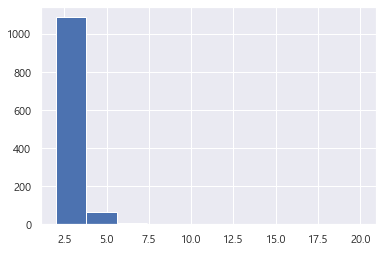

****************************************************************************************************
서류검사유형을 동일 접수번호별로 평균2.5


,접수번호,검사종류 대분류명,검사종류
25,202000373490.0,서류,4
746,20050093076,서류,3


(array([79., 12.,  0.,  9.,  0.,  4.,  0.,  0.,  1.,  1.]),
 array([2. , 2.6, 3.2, 3.8, 4.4, 5. , 5.6, 6.2, 6.8, 7.4, 8. ]),
 <BarContainer object of 10 artists>)

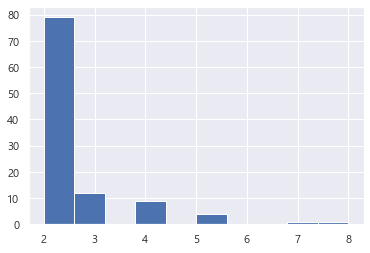

****************************************************************************************************
정밀검사유형을 동일 접수번호별로 평균2.991206030150754


,접수번호,검사종류 대분류명,검사종류
0,202000319294.0,정밀,4
1,202000325663.0,정밀,2


(array([2113.,  164.,   60.,   23.,    5.,   10.,    3.,    3.,    3.,
           4.]),
 array([ 2. ,  4.2,  6.4,  8.6, 10.8, 13. , 15.2, 17.4, 19.6, 21.8, 24. ]),
 <BarContainer object of 10 artists>)

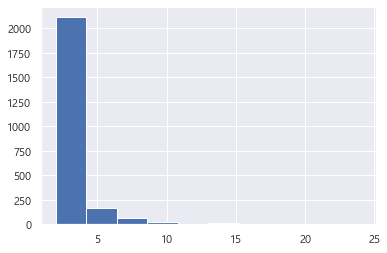

****************************************************************************************************
현장검사유형을 동일 접수번호별로 평균3.057142857142857


,접수번호,검사종류 대분류명,검사종류
238,202000688272.0,현장,2
253,202000726878.0,현장,2


(array([265.,  66.,  13.,   1.,   0.,   1.,   0.,   0.,   1.,   3.]),
 array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22.]),
 <BarContainer object of 10 artists>)

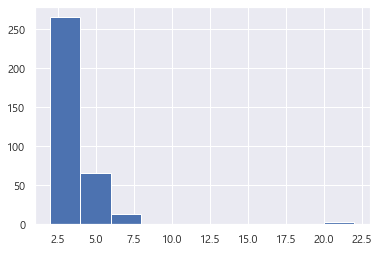

****************************************************************************************************


In [12]:
for i, g in data.groupby(['검사종류 대분류명']):
    avg= g['검사종류'].mean()
    print(f'{i}검사유형을 동일 접수번호별로 평균{avg}')
    g.head(2)
    plt.hist(g['검사종류']); plt.show()
    print('*'*100)

# <font color='red'> 2. 서류와 현장검사를 훈련데이터 부적합 labeling 데이터로 중복할 수 있니?
## 서류/현장검사의 부적합 유형을 확인하여 판단

In [13]:
df['검사종류 대분류명'].value_counts()

정밀       23573
무작위표본     4264
현장        2238
서류        1276
Name: 검사종류 대분류명, dtype: int64

In [14]:
df.head()
df.shape

,접수번호,제품구분,접수일,신고시기,품목명,용도명,제조국(원산지),순중량(Kg),과세가격,과세가격($/Kg),해외제조업소명,행정조치사유1,통보내용,부적합최종처리결과,검사종류 대분류명,검사종류
No,,,,,,,,,,,,,,,,
42.0,20160126197,농.임산물,2016-03-24 09:59:15,본신고,"천궁(뿌리줄기,신선)",판매용,중국,21400.0,17120.0,0.80,NaN,[공통-부적합] 부패변질,현장검사 및 관능검사 결과 곰팡이발생으로 부적합,폐기,현장,현장(정밀검사 대상)
384.0,20160133935,가공식품,2016-03-30 11:16:55,본신고,기타가공품,판매용,필리핀,20.0,200.0,10.00,K-REPUBLIK FOOD MANUFACTURING,[공통-부적합] 식품 등 개별 기준 및 규격 위반,"타르색소 식용색소황색제4호, 식용색소황색제5호 검출(기준:불검출)",폐기,정밀,정밀(수입최소량)
721.0,20151334234,가공식품,2015-12-29 09:06:09,본신고,당절임,판매용,태국,500.0,1575.0,3.15,"CHIN HUAY CO.,LTD.",[공통-부적합] 식품 등 개별 기준 및 규격 위반,이산화황 0.262g/kg 검출(규격: 0.030 미만),반송,정밀,정밀(최초수입품)
749.0,20160156839,가공식품,2016-04-19 09:26:17,본신고,땅콩 또는 견과류가공품,판매용,중국,1020.0,1887.0,1.85,"QINGDAO ZHANGJIALOU FOOD CO.,LTD","[공통-부적합] 미생물(세균수, 대장균 등)","살모넬라 양성(5)(규격: n=5,c=0,m=0/25g)",폐기,정밀,정밀(부적합 재수입식품)
937.0,20160161318,가공식품,2016-04-21 10:04:55,본신고,땅콩 또는 견과류가공품,판매용,중국,2440.0,4514.0,1.85,"QINGDAO ZHANGJIALOU FOOD CO.,LTD","[공통-부적합] 미생물(세균수, 대장균 등)","살모넬라 양성 (기준:n=5, c=0, m=0/25g)",폐기,정밀,정밀(부적합 재수입식품)


(31351, 16)

### 접수번호가 동일한 데이터는 제거

In [15]:
un = df[~df.duplicated('접수번호')]
summary(un)

,데이터형태(dtypes),고유값 수(nunique),결측치 비율(%),중복건수,자료 내용(contents)
접수번호,object,24015,0.0%,0,"[20160126197, 20160133935, 20151334234, 201601..."
제품구분,object,7,0.0%,24008,"[농.임산물, 가공식품, 건강기능식품, 식품첨가물, 기구또는용기.포장, 수산물, 축산물]"
접수일,datetime64[ns],18163,5.0%,5852,"[2016-03-24T09:59:15.000000000, 2016-03-30T11:..."
신고시기,object,3,0.0%,24012,"[본신고, 사전신고, nan]"
품목명,object,1763,0.0%,22252,"[천궁(뿌리줄기,신선), 기타가공품, 당절임, 땅콩 또는 견과류가공품, 알로에 전잎..."
용도명,object,9,0.0%,24006,"[판매용, 자사제품제조용, 반송품(국내기준규격), 반송품(기타), 외화획득용 제품,..."
제조국(원산지),object,120,0.0%,23895,"[중국, 필리핀, 태국, 남아프리카 공화국, 베트남, 싱가포르, 미국, 대만, 인도..."
순중량(Kg),float64,6344,0.0%,17671,"[21400.0, 20.0, 500.0, 1020.0, 2440.0, 1000.0,..."
과세가격,float64,11356,0.0%,12659,"[17120.0, 200.0, 1575.0, 1887.0, 4514.0, 11500..."
과세가격($/Kg),float64,10388,0.0%,13627,"[0.8, 10.0, 3.15, 1.85, 11.5, 1.2, 0.58, 4.615..."


## <font color='blue'> 서류검사 확인 훈련데이터로 부활?

In [16]:
un_paper = un[un['검사종류 대분류명'] == '서류']
for i, g in un_paper.groupby('제품구분'):
    print(i)
    g[['행정조치사유1', '통보내용', '검사종류']]
    print('*'*200)

가공식품


,행정조치사유1,통보내용,검사종류
No,,,
35973.0,[공통-부적합] 수입신고위반(사실과 다름),허위서류제출,서류(동일사 동일식품등)
58919.0,[공통-부적합] 식품첨가물 사용기준 위반,"식품첨가물 사용기준 위반(식용황색색소제4호 사용량:0.88g/kg,기준량:0.5g/...",서류(동일사 동일식품등)
110252.0,[공통-부적합] 식품 등 일반의 기준 및 규격 위반,크기부적합(규격:모양 등 젤리의 크기는 뚜껑과 접촉하는 면의 최소내경이 5.5cm ...,서류(동일사 동일식품등)
110439.0,[공통-부적합] 식품첨가물 사용기준 위반,식용색소황색제4호 2g/kg 사용(기준: 0.5g/kg이하),서류(기타)
143895.0,[공통-부적합] 식품첨가물 사용기준 위반,"식용색소청색제1호 사용기준초과(사용량:1g/kg,기준:0.1g/kg이하),식용색소황...",서류(현장·정밀검사대상)
...,...,...,...
78116.0,[공통-부적합] 식품첨가물 사용기준 위반,"부적합-서류검사결과 소르빈산칼륨 사용기준 초과 (규격:1.0g/kg이하, 사용량:2...",서류(현장·정밀검사대상)
112440.0,[공통-부적합] 허용외 식품첨가물,식품첨가물로 지정취소(고시2008-34호/2009.05.31까지경과조치)된 파라옥시...,서류(자사제조용 원료)
122357.0,[공통-부적합] 식품첨가물 사용기준 위반,삭카린나트륨 사용기준(1.0g/kg) 위반(사용량 8.93g/kg),서류(현장·정밀검사대상)


********************************************************************************************************************************************************************************************************
건강기능식품


,행정조치사유1,통보내용,검사종류
No,,,
139966.0,식품첨가물사용기준위반-식품,"Sucralose(규격:1.25g/kg이하, 사용량:0.3057%)",서류(현장·정밀검사대상)
175187.0,식품첨가물사용기준위반-식품,"SUCRALOSE(규격:1.25g/kg이하, 결과:0.127%)",서류(현장·정밀검사대상)
11176.0,허용외 첨가물 함유(부적합 수입식품 재수입),규격:사용불가(사용할 수 없는5-adenylic acid 사용),서류(현장·정밀검사대상)
17471.0,허용외 첨가물 함유(부적합 수입식품 재수입),규격:사용불가(5-ADENYLIC ACID 사용),서류(현장·정밀검사대상)
104218.0,성분또는원료배합기준위반-식품,10-HDA 제조기준(규격:최종제품에 1.6%이상 함유) 위반(결과: 0.04%),서류(현장·정밀검사대상)
150239.0,보존료-식품,허용외 첨가물인 sodium benzoate 사용,서류(현장·정밀검사대상)
162557.0,기타규격위반-식품,비타민A(규격:1일최대 700mcgRE) 부적합(1000mcgRE),서류(현장·정밀검사대상)
173905.0,식품첨가물사용기준위반-식품,"비타민A,D 1일섭취량의 최대함량 초과사용",서류(현장·정밀검사대상)
109286.0,기타규격위반-식품,식품원료사용불가 CHASTE TREE 사용,서류(현장·정밀검사대상)


********************************************************************************************************************************************************************************************************
기구또는용기.포장


,행정조치사유1,통보내용,검사종류
No,,,
129701.0,식품첨가물사용기준위반-식품,허용외첨가물 아산화질소(N2O) 사용 [기준 : 아산화질소(N2O) 사용불가],서류(현장·정밀검사대상)
69617.0,[공통-기타] 부적합 및 기타 행정조치사유 어느 항목에도 해당되지 않은 경우,기구의기준규격중 일반기준 위반:제품팩킹(PVC)에 DOP사용으로 부적합,서류(현장·정밀검사대상)


********************************************************************************************************************************************************************************************************
농.임산물


,행정조치사유1,통보내용,검사종류
No,,,
728675.0,[공통-부적합] 기타,수입신고 시 변조된 중국 정부증명서(GMO관련) 제출하여 부적합 처리,서류(자사제조용 원료)
73819.0,부패변질(폐사포함)-식품,부패.변질.벌레발생,서류(동일사 동일식품등)
522619.0,부패변질(폐사포함)-식품,"부패,변질",서류(현장·정밀검사대상)
15743.0,[공통-기타] 부적합 및 기타 행정조치사유 어느 항목에도 해당되지 않은 경우,장미잔나비버섯 (Formitopsis Rosea)는 식품원료로서 인정 안됨,서류(기타)
35673.0,[공통-기타] 부적합 및 기타 행정조치사유 어느 항목에도 해당되지 않은 경우,에틸알콜로 추출하고 남은 후추박은 식품원료로 적합하지 않음,서류(기타)
81372.0,[공통-기타] 부적합 및 기타 행정조치사유 어느 항목에도 해당되지 않은 경우,식품의 원료로 사용불가,서류(현장·정밀검사대상)
134446.0,[공통-기타] 부적합 및 기타 행정조치사유 어느 항목에도 해당되지 않은 경우,상황버섯은 식품원료로 인정 안 됨.,서류(기타)
262104.0,[공통-부적합] 수입불가 품목 또는 유형,CASTOR SEED(피마자)는 식품으로 사용할 수 없는 식물임.,서류(현장·정밀검사대상)
158213.0,[공통-기타] 부적합 및 기타 행정조치사유 어느 항목에도 해당되지 않은 경우,식품의 원료로 사용할 수 없는 원료(반하)를 수입신고,서류(현장·정밀검사대상)


********************************************************************************************************************************************************************************************************
수산물


,행정조치사유1,통보내용,검사종류
No,,,
360553.0,[공통-부적합] 기타,수입신고시 위조된 중국 정부증명서(위생증명서)를 제출하여 부적합 처리함.,서류(현장·정밀검사대상)


********************************************************************************************************************************************************************************************************
식품첨가물


,행정조치사유1,통보내용,검사종류
No,,,
1860.0,식품첨가물사용기준위반-식품,허용외첨가물 4-METHYL-5-THIAZOL ETHANOL사용,서류(자사제조용 원료)
8552.0,식품첨가물사용기준위반-식품,허용외 착향물질(METHYL-5 THIAZOL ETHANOL)사용,서류(식용향료)
54487.0,식품첨가물사용기준위반-식품,4-methyl-5-thiazol ethanol은 조합향료의 원료로서 사용할 수 없음.,서류(식용향료)
67890.0,식품첨가물사용기준위반-식품,METHYL METHOXY PYRAZINE은 식품첨가물 원료로서 사용할 수 없음,서류(식용향료)
70128.0,순도시험-식품첨가물,염화물과 유리알칼리,서류(제품검사첨가물)
...,...,...,...
187561.0,[공통-기타] 부적합 및 기타 행정조치사유 어느 항목에도 해당되지 않은 경우,식품첨가물로 고시되지 않은 화학적합성품 사용(MAGNESIUM GLUCONATE등),서류(현장·정밀검사대상)
109371.0,허용외 첨가물 함유(부적합 수입식품 재수입),신고한 성분중 허용외 첨가물(NATAMYCIN) 0.5% 함유,서류(자사제조용 원료)
106882.0,[공통-부적합] 수입불가 품목 또는 유형,BEEF EXTRACT 함유된 일본산 식용향료 (BSE관련제품 수입금지),서류(식용향료)


********************************************************************************************************************************************************************************************************
축산물


,행정조치사유1,통보내용,검사종류
No,,,
26557.0,유통기한경과,NaN,서류(동일사 동일식품등)
47228.0,유통기한경과,NaN,서류(동일사 동일식품등)
95829.0,기타(서류상),NaN,서류(동일사 동일식품등)
173745.0,검역증미첨부,NaN,서류(동일사 동일식품등)
241492.0,유통기한경과,NaN,서류(동일사 동일식품등)
...,...,...,...
495055.0,변질,NaN,서류(동일사 동일식품등)
501077.0,[축산-부적합] 수입위생조건 부적합,NaN,서류(동일사 동일식품등)
503153.0,검역증미첨부,NaN,서류(동일사 동일식품등)


********************************************************************************************************************************************************************************************************


## <font color='blue'> 현장검사 확인 훈련데이터로 부활?

In [17]:
un_paper = un[un['검사종류 대분류명'] == '현장']
for i, g in un_paper.groupby('제품구분'):
    print(i)
    g[['행정조치사유1', '통보내용', '검사종류']]
    print('*'*200)

가공식품


,행정조치사유1,통보내용,검사종류
No,,,
6821.0,[공통-부적합] 제조·가공기준 위반,"제품액이 유출되고 검게 변질되었으며, 내부에 곰팡이등 부패,변질",현장(정밀검사 대상)
63294.0,[공통-부적합] 보존 및 유통기준 위반,식품의 기준 및 규격 제2.6.10)에 따른 보존 및 유통기준 위반(냉장제품을 실온보관),현장(정밀검사 대상)
73586.0,[공통-부적합] 유통기한 변조,수출국표시 및 한글표시사항 유통기한 임의연장,현장(정밀검사 대상)
103218.0,[공통-부적합] 유통기한 변조,원표시 이중부착하여 유통기한 임의연장,현장(기타)
118040.0,[공통-부적합] 유통기한 변조,원표시 이중부착하여 유통기한 임의연장,현장(기타)
...,...,...,...
338382.0,[공통-부적합] 원료 등의 구비요건 위반,식품원료로 사용할 수 없는 살구씨(행인) 사용,현장(정밀검사 대상)
393594.0,[공통-부적합] 허용외 식품첨가물,"허용외 식품첨가물 부틸히드록시아니솔(BHA), 디부틸히드록시톨루엔(BHT) 산화방지...",현장(정밀검사 대상)
462760.0,[공통-부적합] 원료 등의 구비요건 위반,품원료로 사용할 수 없는 살구씨(행인) 사용,현장(정밀검사 대상)


********************************************************************************************************************************************************************************************************
건강기능식품


,행정조치사유1,통보내용,검사종류
No,,,
126253.0,[공통-부적합] 식품 등 개별 기준 및 규격 위반,코엔자임Q10(학명Rhodobacter sphaeroides)은 제조기준에 따른 원...,현장(서류검사 대상)
233413.0,[공통-부적합] 허용외 식품첨가물,허용외 식품첨가물(zinc citrate) 사용 및 아연 제조기준 위반,현장(기타)
360634.0,[공통-부적합] 부적합 제품과 동일 제조일자(또는 유통기한),부적합 제품(201700220464)과 제조일자 및 유통기한이 동일한 제품,현장(정밀검사 대상)
475585.0,[공통-부적합] 부적합 제품과 동일 제조일자(또는 유통기한),부적합 제품(201700470572)과 유통기한이 같은 동일사동일제품,현장(정밀검사 대상)
345241.0,[공통-부적합] 부적합 제품과 동일 제조일자(또는 유통기한),정밀검사결과 부적합 받은 제품(201800210878)과 동일한 제조일자(유통기한)...,현장(정밀검사 대상)
291781.0,[공통-부적합] 식품첨가물 사용기준 위반,이산화규소 3% 사용 (기준: 고결방지제의 경우 기타식품 2%이하),현장(정밀검사 대상)
105103.0,기타규격위반-식품,에페드린검출(기준:불검출)제품과 동일 제조일 제품,현장(본부 지시에 의한 검사)
30597.0,허용외 첨가물 함유(부적합 수입식품 재수입),허용외 첨가물(Sodium Benzoate) 사용,현장(정밀검사 대상)
43517.0,기타규격위반-식품,제조기준위반(식물스테롤 함량이 1일 섭취량당 1000㎎-3000㎎ 이어야 함),현장(정밀검사 대상)


********************************************************************************************************************************************************************************************************
기구또는용기.포장


,행정조치사유1,통보내용,검사종류
No,,,
189590.0,[공통-부적합] 식품 등 일반의 기준 및 규격 위반,물리적 또는 화학적으로 내용물이 오염되기 쉬운 구조임(관능검사 결과 기구(냄비) 내...,현장(서류검사 대상)
175463.0,기타규격위반-식품,법랑의 도포가 균일하지 못하고 흠이있슴,관능(동일사동일식품등)
518745.0,기타규격위반-식품,법랑의 도포가 균일하지 못하고 흠이있슴,관능(동일사동일식품등)
545080.0,기타규격위반-식품,법랑의 도포가 균일하지 못하고 흠이 있슴,관능(동일사동일식품등)
545165.0,기타규격위반-식품,법랑의 도포가 균일하지 못하고 흠이있슴,관능(동일사동일식품등)
555582.0,부패변질(폐사포함)-식품,부패 변질(곰팡이 발생),현장(서류검사 대상)
125837.0,[공통-기타] 부적합 및 기타 행정조치사유 어느 항목에도 해당되지 않은 경우,수입신고전에 원상태를 가공한 상태임,현장(정밀검사 대상)


********************************************************************************************************************************************************************************************************
농.임산물


,행정조치사유1,통보내용,검사종류
No,,,
42.0,[공통-부적합] 부패변질,현장검사 및 관능검사 결과 곰팡이발생으로 부적합,현장(정밀검사 대상)
116038.0,[공통-부적합] 식품 등 개별 기준 및 규격 위반,카드뮴초과로 부적합된2015-1343203호와동일모선동일입항일자로수입한 동일제품임,현장(농.임.축.수산물 중 동일사동일식품)
168279.0,[공통-부적합] 부패변질,수입 식품등 검사에 관한 규정(별표5)에 따른 관능검사 부적합,현장(농.임.축.수산물 중 동일사동일식품)
19186.0,[공통-부적합] 허용외 식품첨가물,기준규격이 고시되지 아니한 식품첨가물(E914)사용에 따른 부적합,현장(농.임.축.수산물 중 동일사동일식품)
68879.0,[공통-부적합] 허용외 식품첨가물,기준규격이 고시되지 아니한 식품첨가물(E914)사용에 따른 부적합,현장(농.임.축.수산물 중 동일사동일식품)
...,...,...,...
313575.0,부패변질(폐사포함)-식품,부패변질(박스외부에 진물발생 및 악취발생),현장(농.임.축.수산물 중 동일사동일식품)
345108.0,[공통-부적합] 부패변질,부패변질,현장(농.임.축.수산물 중 동일사동일식품)
447689.0,[공통-부적합] 부패변질,부패변질되어(곰팡이90%이상 혼입) 부적합,현장(농.임.축.수산물 중 동일사동일식품)


********************************************************************************************************************************************************************************************************
수산물


,행정조치사유1,통보내용,검사종류
No,,,
31667.0,"[수산-현장부적합] 선도,색깔",선도(심한이취) 및 색깔 불량,서류(서류검사대상)
58333.0,[수산-현장부적합] 위생증명서 허위,위조된 위생증명서 제출,정밀(부적합 재수입식품)
67531.0,[수산-현장부적합] 물주입,인위적물주입(내장주위에 얼음이물 혼입),정밀(유해물질검출 업체)
87972.0,"[수산-현장부적합] 선도,이물(기타)",선별 및 이물 혼입(비가식부 내장 및 토사등 이물 미제거),정밀(본부 지시에 의한 검사)
89380.0,[수산-현장부적합] 선별,"선별 부적합(간, 아가미, 유문수 등 미제거)",서류(서류검사대상)
...,...,...,...
238107.0,"[수산-현장부적합] 건조및유소,색깔,선도",선도불량 및 유소현상 발생,"정밀(기준규격의 신설, 강화에 따른 검사)"
300324.0,[수산-현장부적합] 수입제한품목,수입금지품목(독밀복),"정밀(기준규격의 신설, 강화에 따른 검사)"
307946.0,[수산-현장부적합] 보존 및 유통기준,식품위생법제7조4항기준규격및 식품공전제2.6의보존및유통기준위반(현품확인결과 동결상태임),현장검사(수산물)


********************************************************************************************************************************************************************************************************
식품첨가물


,행정조치사유1,통보내용,검사종류
No,,,
381814.0,[공통-부적합] 보존 및 유통기준 위반,보존기준 위반(냉동 제품을 실온창고에 보관),현장(서류검사 대상)
51303.0,유통기한경과-식품,유통기한(96.03.06)초과,현장(정밀검사 대상)
81778.0,[공통-부적합] 수입불가 품목 또는 유형,식품첨가물 미 고시 품목,현장(정밀검사 대상)
84236.0,식품첨가물사용기준위반-식품,안식향산나트륨사용,현장(정밀검사 대상)
222903.0,성상-식품,변색.변질 : 폐기또는반송조치통보,현장(정밀검사 대상)
260041.0,식품첨가물사용기준위반-식품,안식향산나트륨사용,현장(정밀검사 대상)
271427.0,식품첨가물사용기준위반-식품,안식향산나트륨사용,현장(정밀검사 대상)
296608.0,식품첨가물사용기준위반-식품,안식향산나트륨사용,현장(정밀검사 대상)
416454.0,식품첨가물사용기준위반-식품,CALCIUM SACCHARIN 및CALCIUM SILICATE첨가,현장(정밀검사 대상)


********************************************************************************************************************************************************************************************************
축산물


,행정조치사유1,통보내용,검사종류
No,,,
265388.0,변질,"부패,변질로 인한 색깔 불량 및 부패취 발생",현장(식약처장 지정 품목)
296210.0,기타(현물검사),위생적 털 제거 불량,현장(식약처장 지정 품목)
51472.0,해동,관능검사 부적합 : 해동흔적 확인,현장(식약처장 지정 품목)
78317.0,변질,관능검사 부적합 : 변질 확인,현장(식약처장 지정 품목)
373312.0,변질,관능검사 부적합 : 변질(이상취) 확인,현장(식약처장 지정 품목)
...,...,...,...
176806.0,검역증미첨부,NaN,현장(서류검사 대상)
188610.0,[축산-부적합] 수입위생조건 부적합,NaN,현장(농·임·축·수산물)
73681.0,기타(서류상),NaN,현장(식약처장 지정 품목)


********************************************************************************************************************************************************************************************************


# End